In [4]:
import os
from PIL import Image
import math
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#######Upload Images.zip to colab before running this cell###########
import zipfile
zip_ref = zipfile.ZipFile("/content/Images.zip", "r")
zip_ref.extractall("./data")
zip_ref.close()

In [50]:
def SSIM(regionx,regiony):
  mu_x = regionx.mean()
  mu_y = regiony.mean()
  var_x = np.var(regionx,ddof=1)
  var_y = np.var(regiony,ddof=1)
  cov_xy = np.cov(regionx.flatten(),regiony.flatten())[0][1]
  val = (4*mu_x*mu_y*cov_xy)/(((var_x + var_y)*(mu_x**2 + mu_y**2)) + 0.0001)
  return val

In [64]:
def MSSIM(image1,image2):
  val = 0
  count = 256
  pixels_per_xreg = int(image1.shape[0]/16)
  pixels_per_yreg = int(image1.shape[1]/16)
  for i in range(16):
    for j in range(16):
      region1 = image1[pixels_per_xreg*i:pixels_per_xreg*(i+1),pixels_per_yreg*j:pixels_per_yreg*(j+1)]
      region2 = image2[pixels_per_xreg*i:pixels_per_xreg*(i+1),pixels_per_yreg*j:pixels_per_yreg*(j+1)]
      val += SSIM(region1,region2)
  
  return val/count

In [133]:
def MedianOS(image):
  k_size = 1
  x,y = image.shape
  padded = np.pad(image,((k_size,k_size),(k_size,k_size)),'constant')
  filter_img = np.zeros((x,y))
  for i in range(x):
    for j in range(y):
      temp = padded[i:i+2*k_size+1,j:j+2*k_size+1]
      filter_img[i,j] = np.median(temp)
  
  return filter_img

In [132]:
def AlphaTMean(image):
  k_size = 1
  trim = 1
  x,y = image.shape
  padded = np.pad(image,((k_size,k_size),(k_size,k_size)),'constant')
  filter_img = np.zeros((x,y))
  for i in range(x):
    for j in range(y):
      temp = padded[i:i+2*k_size+1,j:j+2*k_size+1]
      sorted_temp = sorted(temp.flatten())
      trimmed = sorted_temp[trim : len(sorted_temp)-trim]
      filter_img[i,j] = int(np.mean(trimmed))
  
  return filter_img

In [114]:
def Get_MSSIM(corrupted_img,uncorrupted_img,noise,sub):
  plt.subplot(sub+1)
  plt.imshow(corrupted_img,cmap='gray')
  plt.title(noise + '_Noise')

  filtered_med = MedianOS(corrupted_img)
  plt.subplot(sub+2)
  plt.imshow(filtered_med,cmap='gray')
  plt.title('Median Filtered image')

  filtered_alpha = AlphaTMean(corrupted_img)
  plt.subplot(sub+3)
  plt.imshow(filtered_alpha,cmap='gray')
  plt.title('Alpha Trimmed Mean Filtered Image')

  print('MSSIM for '+noise+" noise corrupted image:")
  print('Uncorrupted vs Corrupted\t',MSSIM(uncorrupted_img,corrupted_img))
  print('Uncorrupted vs Median Filtered Image\t',MSSIM(uncorrupted_img,filtered_med))
  print('Uncorrupted vs Alpha TMean Filtered Image\t',MSSIM(uncorrupted_img,filtered_alpha),'\n')

MSSIM for Gaussian noise corrupted image:
Uncorrupted vs Corrupted	 0.517863767072471
Uncorrupted vs Median Filtered Image	 0.6708348498869562
Uncorrupted vs Alpha TMean Filtered Image	 0.6843451806026964 

MSSIM for Blurred noise corrupted image:
Uncorrupted vs Corrupted	 0.8898128383219119
Uncorrupted vs Median Filtered Image	 0.8744065787572091
Uncorrupted vs Alpha TMean Filtered Image	 0.8222969356894977 

MSSIM for Laplacian noise corrupted image:
Uncorrupted vs Corrupted	 0.4598910873986672
Uncorrupted vs Median Filtered Image	 0.6866219946046078
Uncorrupted vs Alpha TMean Filtered Image	 0.671439601437203 



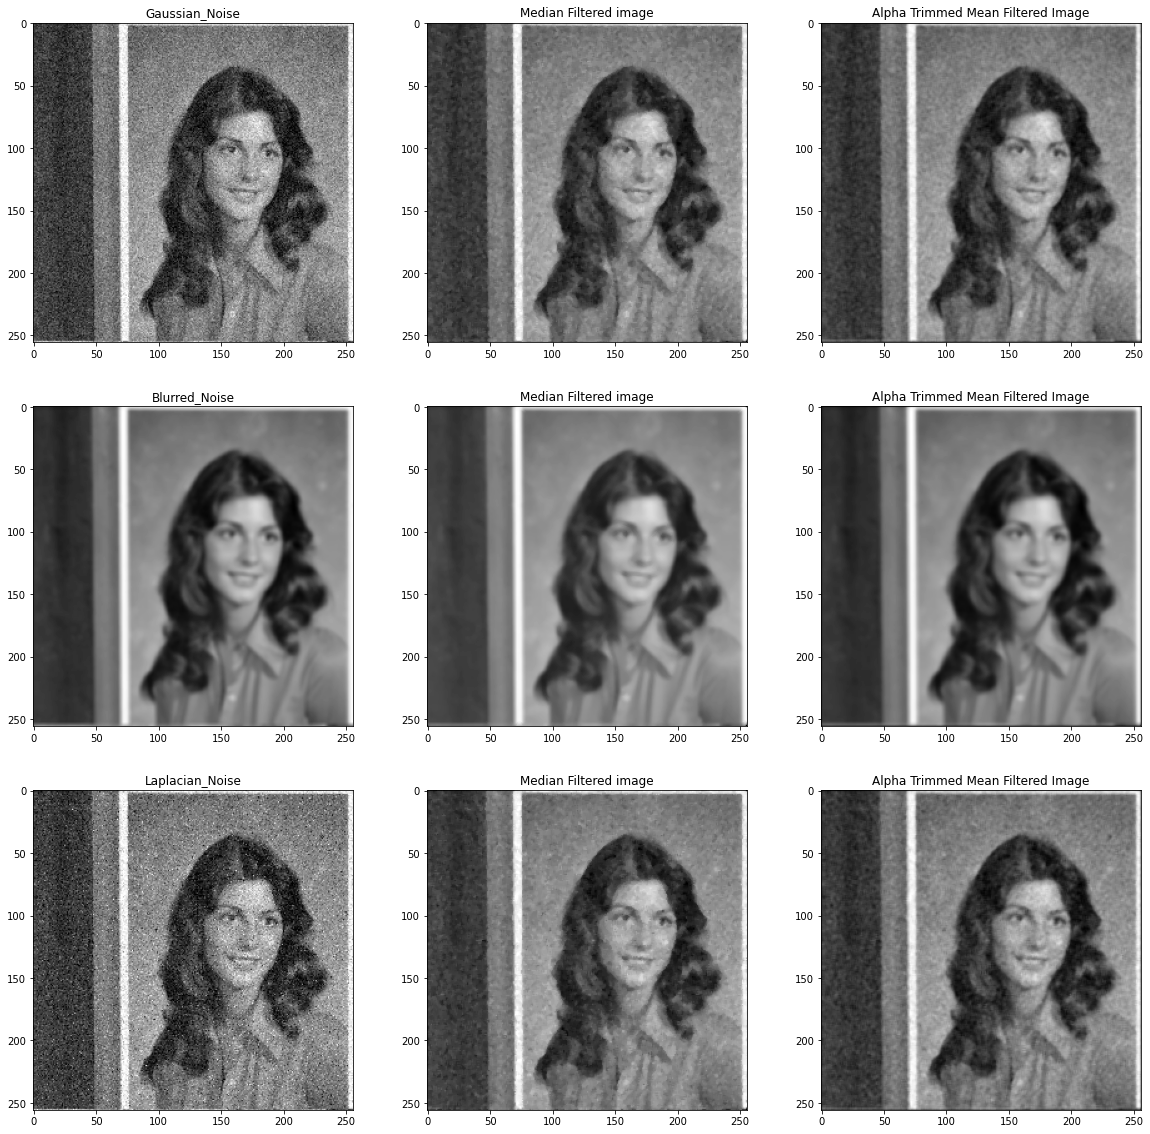

In [136]:
plt.figure(figsize=(20,20))
im = Image.open("/content/data/images/1.tiff")
uncorrupted_img = np.array(im)

im = Image.open('/content/data/images/1G.bmp')
gaussian_img = np.array(im)
Get_MSSIM(gaussian_img,uncorrupted_img,"Gaussian",330)

im = Image.open('/content/data/images/1B.bmp')
blurred_img = np.array(im)
Get_MSSIM(blurred_img,uncorrupted_img,"Blurred",333)

im = Image.open('/content/data/images/1L.bmp')
laplacian_img = np.array(im)
Get_MSSIM(laplacian_img,uncorrupted_img,"Laplacian",336)

plt.savefig('/content/1FilterImg.jpg')

MSSIM for Gaussian noise corrupted image:
Uncorrupted vs Corrupted	 0.5552339002828768
Uncorrupted vs Median Filtered Image	 0.7092028793949973
Uncorrupted vs Alpha TMean Filtered Image	 0.7281973375377577 

MSSIM for Blurred noise corrupted image:
Uncorrupted vs Corrupted	 0.9122203529771093
Uncorrupted vs Median Filtered Image	 0.902555597283105
Uncorrupted vs Alpha TMean Filtered Image	 0.8688196816086586 

MSSIM for Laplacian noise corrupted image:
Uncorrupted vs Corrupted	 0.5075675142584768
Uncorrupted vs Median Filtered Image	 0.7215045904662254
Uncorrupted vs Alpha TMean Filtered Image	 0.7144614169968367 



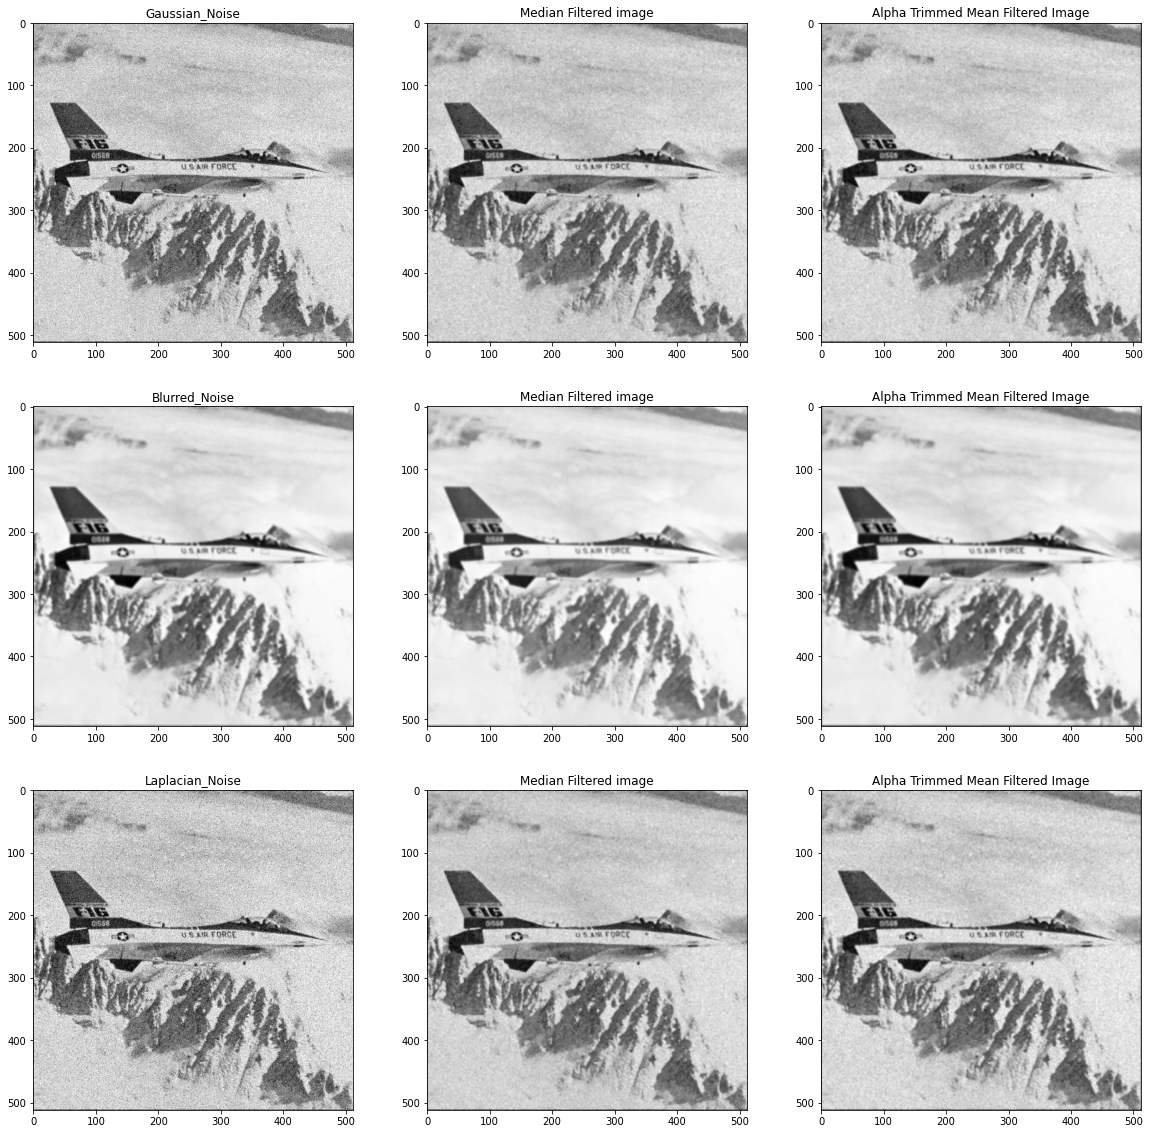

In [135]:
plt.figure(figsize=(20,20))
im = Image.open("/content/data/images/2.tiff")
uncorrupted_img = np.array(im)

im = Image.open('/content/data/images/2G.bmp')
gaussian_img = np.array(im)
Get_MSSIM(gaussian_img,uncorrupted_img,"Gaussian",330)

im = Image.open('/content/data/images/2B.bmp')
blurred_img = np.array(im)
Get_MSSIM(blurred_img,uncorrupted_img,"Blurred",333)

im = Image.open('/content/data/images/2L.bmp')
laplacian_img = np.array(im)
Get_MSSIM(laplacian_img,uncorrupted_img,"Laplacian",336)

plt.savefig('/content/2FilterImg.jpg')

MSSIM for Gaussian noise corrupted image:
Uncorrupted vs Corrupted	 0.6642692002615482
Uncorrupted vs Median Filtered Image	 0.8231609868363925
Uncorrupted vs Alpha TMean Filtered Image	 0.8390701725863745 

MSSIM for Blurred noise corrupted image:
Uncorrupted vs Corrupted	 0.9258023763930815
Uncorrupted vs Median Filtered Image	 0.9218045332702698
Uncorrupted vs Alpha TMean Filtered Image	 0.9069672369461466 

MSSIM for Laplacian noise corrupted image:
Uncorrupted vs Corrupted	 0.5964026852864263
Uncorrupted vs Median Filtered Image	 0.830008973823176
Uncorrupted vs Alpha TMean Filtered Image	 0.8249284958439816 



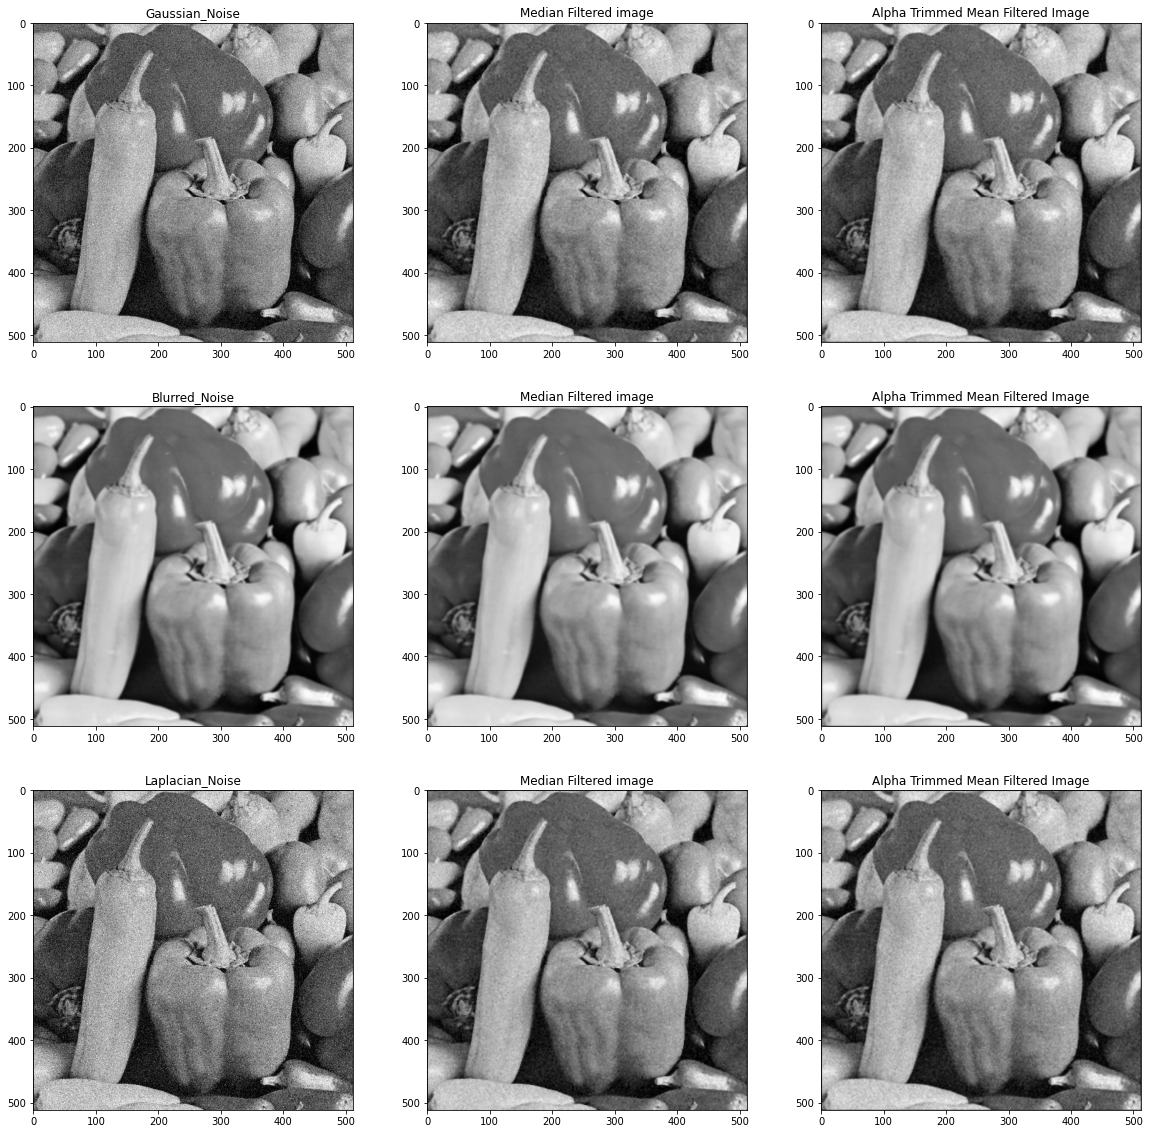

In [134]:
plt.figure(figsize=(20,20))
im = Image.open("/content/data/images/3.tiff")
uncorrupted_img = np.array(im)

im = Image.open('/content/data/images/3G.bmp')
gaussian_img = np.array(im)
Get_MSSIM(gaussian_img,uncorrupted_img,"Gaussian",330)

im = Image.open('/content/data/images/3B.bmp')
blurred_img = np.array(im)
Get_MSSIM(blurred_img,uncorrupted_img,"Blurred",333)

im = Image.open('/content/data/images/3L.bmp')
laplacian_img = np.array(im)
Get_MSSIM(laplacian_img,uncorrupted_img,"Laplacian",336)

plt.savefig('/content/3FilterImg.jpg')